In [265]:
## Exercício 9

## Utilizando os Dados Históricos de MGLU3 e LREN3: Mostre 
## através de um gráfico de linhas a evolução do preço de 
## fechamento das duas ações durante os anos de 2017, 2018 e 2019.
## No mesmo gráfico, trace um gráfico de linhas pontilhadas com a 
## evolução do preço de abertura das duas ações no mesmo período. 
## Utilize cores diferentes para cada linha e insira uma legenda 
## para as cores/linhas. A legenda deve ficar no canto inferior 
## direito, como este exemplo:

In [266]:
import pandas as pd
from matplotlib.colors import LogNorm
import seaborn as sns

df1 = pd.read_csv('MGLU3.SA.csv')
df2 = pd.read_csv('LREN3.SA.csv')

In [267]:
## Concatenando
data = pd.concat([df1,df2])

## Pegando nos períodos de 2017, 2018 e 2019
data = data[(data['Date']>'2017') & (data['Date']<'2020')]

# ## transformando apenas no ano, para facilitar a visualização
data['Year'] = pd.DatetimeIndex(data['Date']).year

In [268]:
## Separando open por ano, depois juntando e somando
open2017 = data[['Year','Open']]
open2017 = open2017[open2017['Year']==2017]
open2017 = open2017.groupby('Year').sum().reset_index()

open2018 = data[['Year','Open']]
open2018 = open2018[open2018['Year']==2018]
open2018 = open2018.groupby('Year').sum().reset_index()

open2019 = data[['Year','Open']]
open2019 = open2019[open2019['Year']==2019]
open2019 = open2019.groupby('Year').sum().reset_index()

####

close2017 = data[['Year','Close']]
close2017 = close2017[close2017['Year']==2017]
close2017 = close2017.groupby('Year').sum().reset_index()

close2018 = data[['Year','Close']]
close2018 = close2018[close2018['Year']==2018]
close2018 = close2018.groupby('Year').sum().reset_index()

close2019 = data[['Year','Close']]
close2019 = close2019[close2019['Year']==2019]
close2019 = close2019.groupby('Year').sum().reset_index()


close = pd.concat([close2019,close2018,close2017])
close['type'] = 'close'
open = pd.concat([open2019,open2018,open2017])
open['type'] = 'open'

##renomeando
open.rename(columns={'Open':'Value'}, 
                 index={0:'zero',1:'one'}, 
                 inplace=True)

close.rename(columns={'Close':'Value'}, 
                 index={0:'zero',1:'one'}, 
                 inplace=True)



In [294]:
# total = pd.concat([close,open])
# total

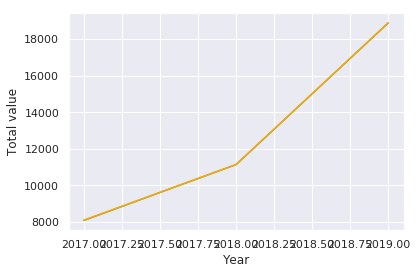

In [276]:
## tentando plotar 

plt.plot(open.Year, open.Value, color='g')
plt.plot(close.Year, close.Value, color='orange')
plt.xlabel('Year')
plt.ylabel('Total value')
# plt.title('Pakistan India Population till 2010')
plt.show()

No handles with labels found to put in legend.


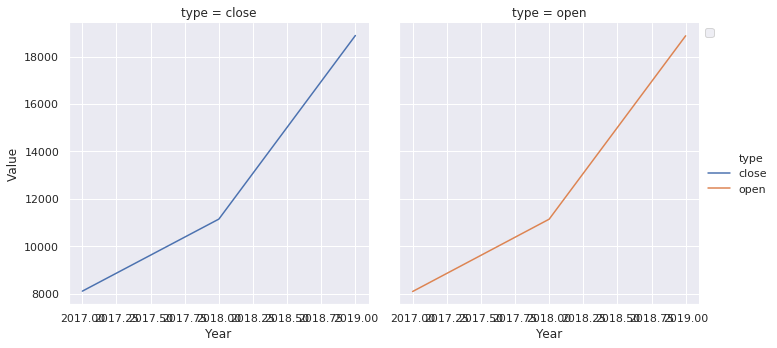

In [295]:
## plotei separadamente, os valore sestão bem próximos e não tem diferença visual
## ou eu estou 100% errada (o q é mais provável)

g = sns.relplot(x="Year", y="Value",

                 col="type", hue="type",

                 kind="line", data=total)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

# import plotly.express as px

# df = px.data.gapminder().query("continent=='Oceania'")
# fig = px.line(total, x="Year", y="Value", color='type')
# fig.show()

type
open    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

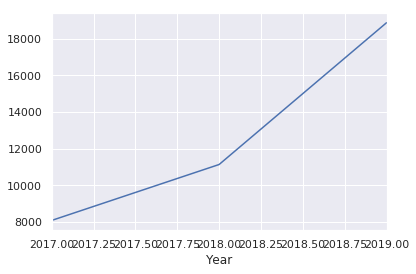

In [293]:
fig, ax = plt.subplots()
open.groupby('type').plot(x='Year', y='Value', ax=ax, legend=False)